In [1]:
#given a tree and pickled model, predict top N probabilities and classes
from functions import *

#test data
table = 'contract-explorer-233919.ethparis.functions3'
limit = 'LIMIT 100'

sql = '''
SELECT *  FROM `{}`
 {}
'''.format(table, limit)

df = client.query(sql, location='europe-west2').to_dataframe()

target = df.hash
trees = df.tree

#unpickle processing pipeline and model
rf = pd.read_pickle('pickle/rf.p')
pipe = pd.read_pickle('pickle/pipe.p')

# %%writefile servemodel.py


In [2]:

def predict_model(trees, N=3):
    '''
    Input: list of JSON trees, N
    Output: Top N probabilities, Top N classes (lists)'''
    
    #run data preprocessing pipeline
    pp = Preprocess().fit_transform(trees)
    result_test = pipe.transform(pp)
    
    #make prediction, sort indices by highest probability
    probs = rf.predict_proba(result_test)
    indices = np.argsort(probs, axis=1)[:,-N:]
    p = copy(probs)
    p.sort(axis=1)
    
    #sort in reverse order, flatten to 1D array (don't do flatten if predicting multiple points at once)
    top_n_probs = p[:,-N:][:,::-1]
    top_n_classes = rf.classes_[indices][:,::-1]
    
    return pd.DataFrame(np.concatenate((df[['addr', 'hash']].values.reshape(-1,2),top_n_probs, top_n_classes), axis=1))


result = predict_model(trees, N=1)

In [3]:
def result_vector(trees, N=3):
    '''
    Input: list of JSON trees, N
    Output: Top N probabilities, Top N classes (lists)'''
    
    #run data preprocessing pipeline
    pp = Preprocess().fit_transform(trees)
    result_test = pipe.transform(pp)
    return result_test



In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
vects = result_vector(trees, N=1)

In [6]:
vects = vects[:20]

In [7]:
sims = cosine_similarity(vects)

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

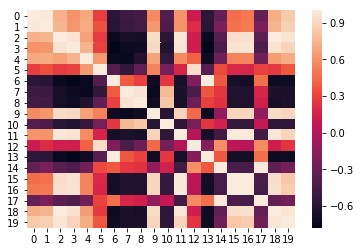

In [11]:
sns.heatmap(sims)

In [21]:
subset = result[(result[1]!=result[3]) & (result[2]>.50)]

In [22]:
subset.to_csv('output.csv')

In [26]:
subset.sort_values(by=2, ascending=False)

,0,1,2,3
1769,0x82D193F8Ee41D12aaA0A85cB006606D67F773E9c,0x95d89b41,1,0x06fdde03
8010,0xC20F72996879161E45E39E0A93297905959589a2,0x4e3dc2f1,1,0x9c37b8e1
1396,0x591E1A564dD317885E123D3aC1178Da8D5f7b038,0x8eb6d683,1,0xdd62ed3e
2519,0x338fFc2CaFC121BC83bF7A610CCc136Ba7247B64,0xa055d455,0.999164,_fallback()
2518,0x338fFc2CaFC121BC83bF7A610CCc136Ba7247B64,0x9652713e,0.999164,_fallback()
7400,0x84E0F7667eF8F9fA16C9cf67d8Bc05cc504De7f2,0xd0e30db0,0.999164,_fallback()
7401,0x575463adb378119Cb5fE4402CfD14358E9B3EF9f,0xa9059cbb,0.999164,_fallback()
7402,0x06Ea5e282f8945E137bAfb6324f682e50a7C142A,0xc0ee0b8a,0.999164,_fallback()
7403,0xf49CDD50aD408d387d611F88A647179C3de3492b,0xc0ee0b8a,0.999164,_fallback()
3477,0x139d415b5fd0981fBEe78D0fa503168855b34652,0xaa6ca808,0.989881,_fallback()
